In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
spds=pd.read_csv("/content/Advertising.csv")

In [ ]:
spds.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
spds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
spds.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
spds.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
spds.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


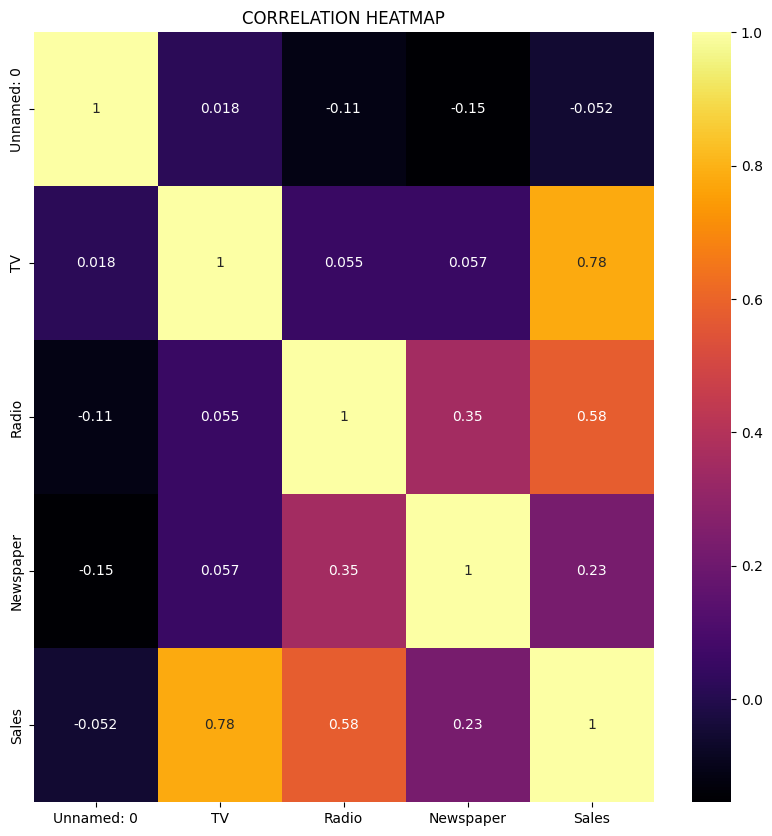

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(spds.corr(),cmap="inferno",annot=True)
plt.title("CORRELATION HEATMAP")
plt.show()

In [ ]:
px.scatter(spds,x="Radio",y="Newspaper",title="RADIO VS NEWSPAPER",height=500,width=800)

In [ ]:
px.scatter(spds,x="TV",y="Radio",title="TV VS RADIO",height=600,width=800)

In [ ]:
px.scatter(spds,x="Newspaper",y="TV",title="NEWSPAPER VS TV",height=500,width=800)

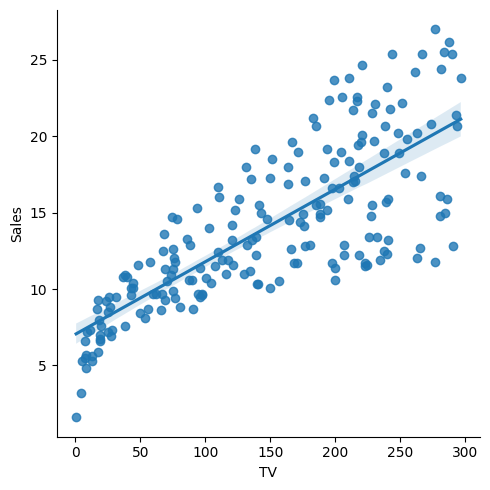

In [ ]:
sns.lmplot(x="TV",y="Sales",data=spds)

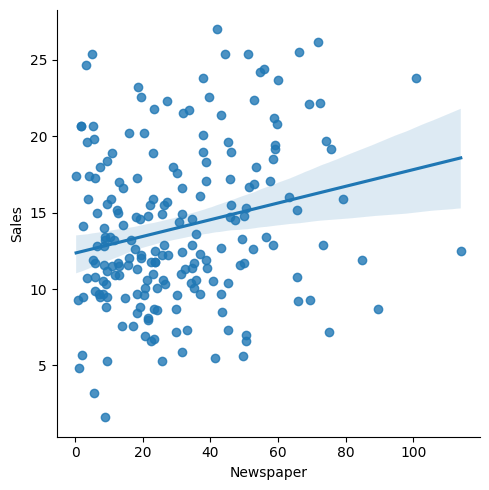

In [ ]:
sns.lmplot(x="Newspaper",y="Sales",data=spds)

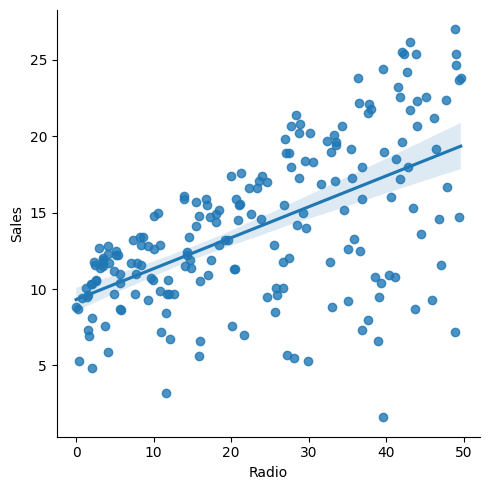

In [ ]:
sns.lmplot(x="Radio",y="Sales",data=spds)

In [ ]:
spds

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
x=spds.drop("Sales",axis=1)
y=spds[["Sales"]]

In [ ]:
x.shape

(200, 4)

In [ ]:
y.shape

(200, 1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140, 4), (140, 1), (60, 4), (60, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

array([3.13899028])

In [ ]:
model.coef_

array([[-0.00213641,  0.04381151,  0.2000776 ,  0.00108184]])

In [ ]:
predict=model.predict(x_test)
x_test

,Unnamed: 0,TV,Radio,Newspaper
18,19,69.2,20.5,18.3
170,171,50.0,11.6,18.4
107,108,90.4,0.3,23.2
98,99,289.7,42.3,51.2
177,178,170.2,7.8,35.2
182,183,56.2,5.7,29.7
5,6,8.7,48.9,75.0
146,147,240.1,7.3,8.7
12,13,23.8,35.1,65.9
152,153,197.6,23.3,14.2


In [ ]:
spds=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':predict.flatten()})
spds.head(20)

,Actual,Predict
0,11.3,10.251544
1,8.4,7.305046
2,8.7,6.953941
3,25.4,24.138354
4,11.7,11.814115
5,8.7,6.382808
6,7.2,13.372265
7,13.2,14.814061
8,9.2,11.247948
9,16.6,16.146445


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.8621248894184086